In [22]:
# Installing latest tensorflow GPU
!pip install tensorflow-gpu==2.3.1

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
tf.__version__

'2.3.1'

### Dataset preprocessing

Dataset link

https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/discussion

In [25]:
# The IMDB dataset contains 50,000 movie reviews for natural language processing or Text analytics.
# It has two columns-review and sentiment. The review contains the actual review and the sentiment tells 
# us whether the review is positive or negative

In [26]:
# num_words
# integer or None. Words are ranked by how often they occur (in the training set) and
# only the `num_words` most frequent words are kept.
imdb_data = imdb.load_data(num_words =20000)

In [27]:
imdb_data

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 194, 1153, 194

In [28]:
# All  words in the reviews are already represented by number/integer and reviews are converted to list by default in dataset

In [39]:
(x_train,y_train),(x_test,y_test) = imdb_data

In [40]:
# In training there are 25000 reviews

x_train.shape

(25000,)

In [41]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,

In [44]:
y_train.shape

(25000,)

In [45]:
y_train[0]

1

In [32]:
# From length of review we see that
# First review consist of 218 words
# Second review consist of 189 words
len(x_train[0]),len(x_train[1])

(218, 189)

Sequence padding:

- https://machinelearningmastery.com/data-preparation-variable-length-input-sequences-sequence-prediction/
- https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do

In [46]:
# pad_sequences is used to ensure that all sequences in a list have the same length.
# By default this is done by padding 0 in the beginning of each sequence until each 
# sequence has the same length as the longest sequence.

# If you want to specify the maximum length of each sequence you can use the maxlen argument. 
#This will truncate all sequences longer than maxlen

#According to the documentation one can control the truncation with the pad_sequences.
# By default truncating is set to pre, which truncates the beginning part of the sequence.
# If you rather want to truncate the end part of the sequence you can set it to post.


# Here we are truncating all reviews more than 100 and padding zero in those sequences which has less than 100 words
# padding and truncating is either from start i.e pre or from end i.e post
# Default sequence truncation is pre (i.e from begining) and if we need to truncate from end write padding=Post


# Padding 0 for reviews having less than 100 words
# truncating reviews having more than 100 words from end at 100th word position
x_train = pad_sequences(x_train,maxlen = 100,padding = 'post')
x_test= pad_sequences(x_test,maxlen = 100, padding = 'post')

In [48]:
# All x_train has now 100 columns
x_train.shape,y_train.shape

((25000, 100), (25000,))

### Building Model

In [49]:
vocab_size = 20000
embed_size = 128

In [50]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,Dropout

In [53]:
model = Sequential()
model.add(Embedding(vocab_size,embed_size,input_shape=(x_train.shape[1],)))
model.add(LSTM(units=60,activation='tanh'))
model.add(Dropout(0.3))

model.add(Dense(units =1, activation ='sigmoid'))


In [54]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 60)                45360     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(x_train,y_train,epochs=5,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/5
196/196 [==============================] - 54s 275ms/step - loss: 0.4483 - accuracy: 0.7836 - val_loss: 0.3435 - val_accuracy: 0.8503
Epoch 2/5
196/196 [==============================] - 53s 271ms/step - loss: 0.2379 - accuracy: 0.9085 - val_loss: 0.3459 - val_accuracy: 0.8498
Epoch 3/5
196/196 [==============================] - 54s 274ms/step - loss: 0.1605 - accuracy: 0.9429 - val_loss: 0.3822 - val_accuracy: 0.8440
Epoch 4/5
196/196 [==============================] - 54s 277ms/step - loss: 0.1022 - accuracy: 0.9657 - val_loss: 0.5283 - val_accuracy: 0.8356
Epoch 5/5
196/196 [==============================] - 55s 283ms/step - loss: 0.0676 - accuracy: 0.9794 - val_loss: 0.5967 - val_accuracy: 0.8315


In [57]:


history.history

{'accuracy': [0.7835999727249146,
  0.9084799885749817,
  0.9429200291633606,
  0.9656800031661987,
  0.9793999791145325],
 'loss': [0.44825705885887146,
  0.23785415291786194,
  0.1604536473751068,
  0.10220123827457428,
  0.06756297498941422],
 'val_accuracy': [0.8502799868583679,
  0.8497999906539917,
  0.8440399765968323,
  0.8355600237846375,
  0.8314800262451172],
 'val_loss': [0.3435150682926178,
  0.34591034054756165,
  0.3822191059589386,
  0.5283052921295166,
  0.5966747403144836]}

In [58]:
# Plotting accuracy and model loss
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

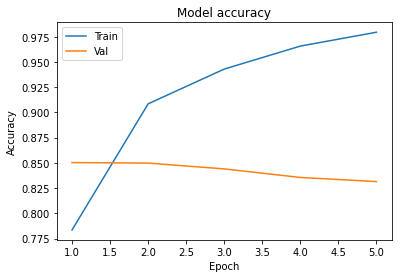

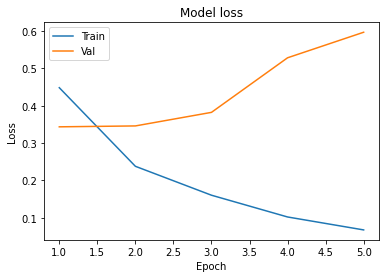

In [59]:
plot_learningCurve(history,5)

### Testing model

Epoch 1/5
196/196 [==============================] - 54s 278ms/step - loss: 0.4420 - accuracy: 0.7818 - val_loss: 0.3533 - val_accuracy: 0.8465
Epoch 2/5
196/196 [==============================] - 54s 275ms/step - loss: 0.2416 - accuracy: 0.9062 - val_loss: 0.3459 - val_accuracy: 0.8473
Epoch 3/5
196/196 [==============================] - 55s 280ms/step - loss: 0.1590 - accuracy: 0.9428 - val_loss: 0.4118 - val_accuracy: 0.8402
Epoch 4/5
196/196 [==============================] - 54s 275ms/step - loss: 0.1009 - accuracy: 0.9660 - val_loss: 0.4386 - val_accuracy: 0.8274
Epoch 5/5
196/196 [==============================] - 54s 276ms/step - loss: 0.0753 - accuracy: 0.9752 - val_loss: 0.5752 - val_accuracy: 0.8299


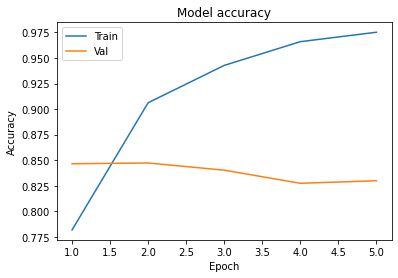

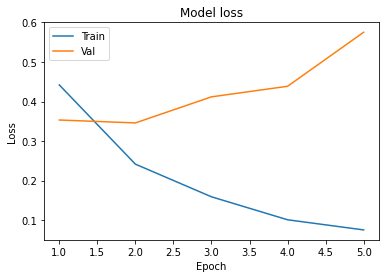

In [63]:
model = Sequential()
model.add(Embedding(vocab_size,embed_size,input_shape=(x_train.shape[1],)))

model.add(LSTM(units=60,activation='tanh'))
model.add(Dropout(0.3))

# model.add(LSTM(units=120,activation='tanh'))
# model.add(Dropout(0.3))

model.add(Dense(units =1, activation ='sigmoid'))



model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=5,batch_size=128,validation_data=(x_test,y_test))
plot_learningCurve(history,5)